In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [2]:
def clean(df, topk=False):
    df = df[df['State'] == 'finished']

    if topk:
        patterns = ['experts$', 'lb_alpha$', 'effective_l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed']
    else:
        patterns = ['experts$', 'lb_alpha$', 'l0$', 'frac_recovered$', 'mse_loss$', 'loss_original$', 'loss_reconstructed']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]
    
    if topk:
        l0 = df["effective_l0"].to_numpy().flatten()
    else:
        l0 = df["l0"].to_numpy().flatten()
    experts = df["experts"].to_numpy().flatten()
    lb_alpha = df["lb_alpha"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([l0, lb_alpha, experts, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['l0', 'lb_alpha', 'experts', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='lb_alpha')
    return df

In [3]:
df = pd.read_csv("lb-sweep.csv")

In [4]:
df = clean(df, topk=True)

In [5]:
df

,l0,lb_alpha,experts,mse_loss,frac_recovered,delta_ce
22,64.0,0.000,16.0,1136.872803,0.991799,0.115092
10,64.0,0.000,32.0,1251.002197,0.989994,0.140432
11,64.0,0.001,32.0,1270.413330,0.989966,0.143780
23,64.0,0.001,16.0,1152.323730,0.991408,0.123126
8,64.0,0.003,32.0,1252.107056,0.989904,0.141683
20,64.0,0.003,16.0,1142.496948,0.991763,0.115603
9,64.0,0.010,32.0,1278.265381,0.990108,0.141751
21,64.0,0.010,16.0,1172.539795,0.991501,0.121791
6,64.0,0.030,32.0,1218.798096,0.990353,0.135388
18,64.0,0.030,16.0,1138.393555,0.991749,0.115796


In [6]:
df16 = df[df['experts'] == 16]
df32 = df[df['experts'] == 32]

In [7]:
df16

,l0,lb_alpha,experts,mse_loss,frac_recovered,delta_ce
22,64.0,0.000,16.0,1136.872803,0.991799,0.115092
23,64.0,0.001,16.0,1152.323730,0.991408,0.123126
20,64.0,0.003,16.0,1142.496948,0.991763,0.115603
21,64.0,0.010,16.0,1172.539795,0.991501,0.121791
18,64.0,0.030,16.0,1138.393555,0.991749,0.115796
19,64.0,0.100,16.0,1117.574707,0.991665,0.119446
16,64.0,0.300,16.0,1049.797485,0.992627,0.103469
17,64.0,1.000,16.0,1039.455811,0.992996,0.100372
14,64.0,3.000,16.0,1038.974609,0.993164,0.095937
15,64.0,10.000,16.0,1048.355225,0.992661,0.105170


In [8]:
df32

,l0,lb_alpha,experts,mse_loss,frac_recovered,delta_ce
10,64.0,0.000,32.0,1251.002197,0.989994,0.140432
11,64.0,0.001,32.0,1270.413330,0.989966,0.143780
8,64.0,0.003,32.0,1252.107056,0.989904,0.141683
9,64.0,0.010,32.0,1278.265381,0.990108,0.141751
6,64.0,0.030,32.0,1218.798096,0.990353,0.135388
7,64.0,0.100,32.0,1180.184937,0.990784,0.132068
4,64.0,0.300,32.0,1119.521606,0.992109,0.110737
5,64.0,1.000,32.0,1109.653564,0.991648,0.119684
2,64.0,3.000,32.0,1100.328003,0.992581,0.104123
3,64.0,10.000,32.0,1109.928345,0.991739,0.118382


## Plotting

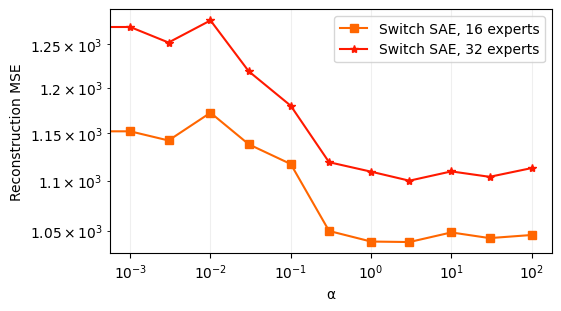

In [25]:
import matplotlib.pyplot as plt

# Example dataframes df16 and df32 assumed to be defined earlier

plt.figure(figsize=(5.5, 3))

plt.plot(df16['lb_alpha'], df16['mse_loss'], label='Switch SAE, 16 experts', marker='s', color=plt.cm.autumn(0.4))
plt.plot(df32['lb_alpha'], df32['mse_loss'], label='Switch SAE, 32 experts', marker='*', color=plt.cm.autumn(0.1))

plt.xscale('log')
plt.yscale('log')

plt.xlabel("\u03B1")
plt.ylabel("Reconstruction MSE")

plt.legend()

# Get the current Axes object
ax = plt.gca()

#ax.set_xticks([1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1e0, 3e0, 1e1, 3e1, 1e2])
#ax.set_xticklabels([r"$0.001$", r"$0.003$", r"$0.01$", r"$0.03$", r"$0.1$", r"$0.3$", r"$1$", r"$3$", r"$10$", r"$30$", r"$100$"])

ax.grid(True, which="major", ls="-", alpha=0.2)

ax.xaxis.set_minor_locator(plt.NullLocator())


plt.tight_layout(pad=0.3)
plt.savefig("alpha_mse.pdf")


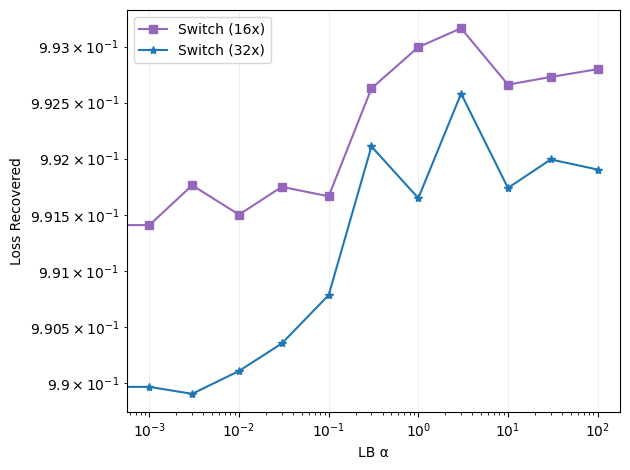

In [98]:
plt.plot(df16['lb_alpha'], df16['frac_recovered'], label='Switch (16x)', marker='s', color='#9467bd')
plt.plot(df32['lb_alpha'], df32['frac_recovered'], label='Switch (32x)', marker='*', color='#1f77b4')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("LB \u03B1")
plt.ylabel("Loss Recovered")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("alpha_lossrec.png")
plt.show()

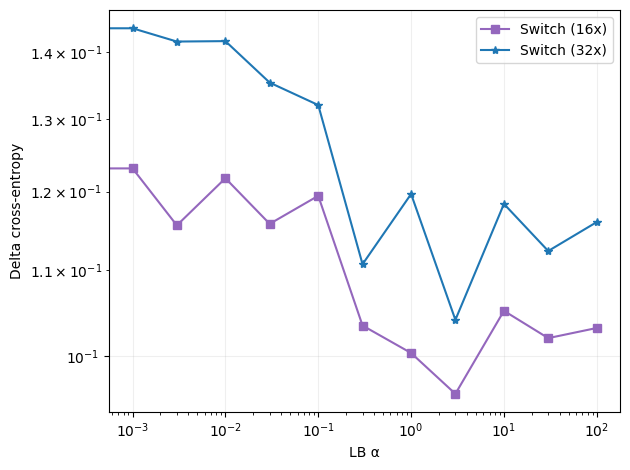

In [99]:
plt.plot(df16['lb_alpha'], df16['delta_ce'], label='Switch (16x)', marker='s', color='#9467bd')
plt.plot(df32['lb_alpha'], df32['delta_ce'], label='Switch (32x)', marker='*', color='#1f77b4')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("LB \u03B1")
plt.ylabel("Delta cross-entropy")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("alpha_deltace.png")
plt.show()

In [100]:
## Conclusion: alpha = 3.0 is best